<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Universal_Style_Transfer_via_Feature_Transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Universal Style Transfer via Feature Transforms**

논문 링크: https://arxiv.org/abs/1705.08086

기존의 방식들은 일반화, 품질 및 효율성 사이에서 trade-off 관계를 가진다. 즉,Image style transfer using convolutional neural networks 기반 방식들은 만족스러운 시각적 품질로 임의의 style에 대해 처리 할 수 ​​있지만 높은 계산 비용이 든다. 반면 feed-forward 방식은 효율적으로 실행되지만 고정된 수의 style로 제한되거나 시각적 품질이 저하가 된다. 따라서 본 논문은 이러한 문제점을 개선하기 위해 나온 논문이다.

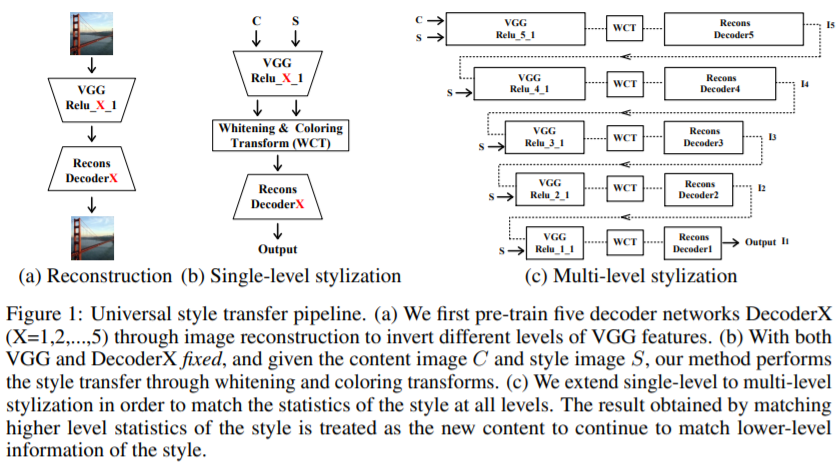

먼저 위의 그림 Figure 1 (a) 부분을 보겠다. 먼저, 기존 style transfer 기반 network들과 동일하게 pretrained된 VGG-19를 feature를 뽑아내는 용도의 encoder로 활용을 하고, 대칭 decoder를 train시켜 원래 image로 복구한다. 즉,  image reconstruction 작업이다.

그 다음 (b) 부분을 보겠다. (a) 부분에서 훈련하였던 decoder도 encoder와 같이 고정을 시키고, 그 사이에 **WCT(Whitening & Coloring & Transform)**을 적용시켜 style을 입힌다. 이를 (c) 부분과 같이 모든 encoder와 decoder 사이에 적용시킨다.

### **Reconstruction decoder**

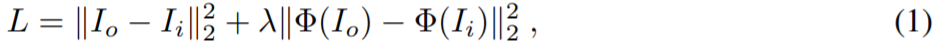

이때 decoder를 train할 때 사용되는 reconstruction loss는 위의 식과 같이 pixel reconstruction loss과 feature loss로 이루어져 있다. 이때, I_i는 input image이고,  I_o는 재구성된 output image이다. 그리고 Φ는 VGG-19의 Relu_X_1 부분에 해당한다. 또한 λ는 두 loss의 균형을 맞추기위한 hyper-parameter이다.

### **Whitening and coloring transforms**

먼저 수식을 보기 전에 I_c는 content image, I_s는 style image , f_c ∈ R^(C×H_cW_c)는 content feature map이며, f_s ∈ R^(C×H_sW_s)는 style feature map 이다. 이때 H_c, W_c(H_s, W_s)은 각각 높이와 너비이며, C는 channel 수이다.

WCT의 목적은 f_c의 gram matrix를 f_s와 일치하도록 변환하는 것이다.

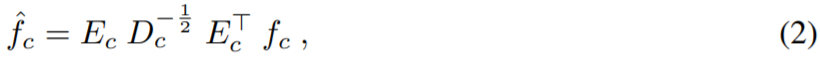

먼저 whitening transform에 대해 알아보겠다. 위의 식이 바로 whitening에 관한 식이다. 이때, D_c는 gram matrix f_c f_c^T ∈ R^(C×C)의 고유값을 가지는 **diagonal matrix**이다. E_c는 f_c f_c^T = E_c D_c E_c^T를 만족하는 **orthogonal matrix**이다.

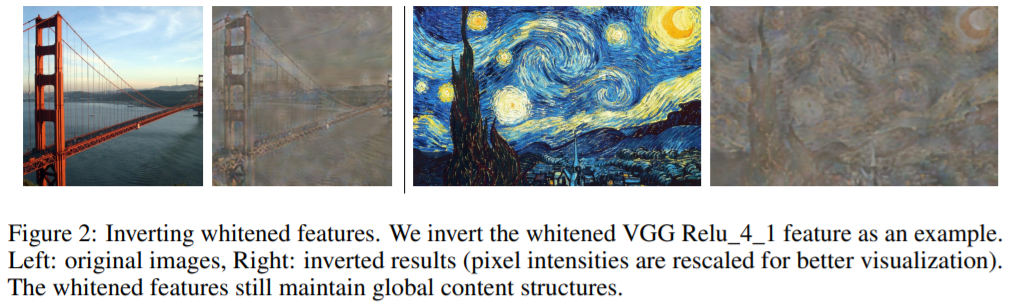

위의 그림 Figure 2은 whitned된 feature을 보여준다. image content의 전체 구조를 여전히 유지하지만 style과 관련된 다른 정보는 제거한다. 특히 오른쪽의 Starry_night 경우 원본 image의 stroke patterns이 제거가 되었다.

즉, **whitening 단계는 content image의 구조는 유지하면서 content image의 style을 벗겨내는 과정**이다.

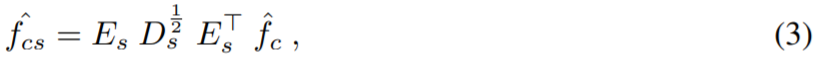

이전 단계인 whitening 단계에서 content image의 style을 벗겨냈으므로 이제 벗겨낸 iamge에 style image의 style을 입혀야한다. 이 과정을 coloring 단계라고 하며 수식은 위와 같다. 먼저 f_s에 평균 vector m_s를 뺀 후, 원하는 상관 관계를 갖는 ˆf_cs를 얻기 위해 위의 식과 같이 ˆf_c를 선형으로 변환하는 whitening 단계의 역수인 coloring transform을 실행한다.

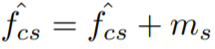

마지막으로 위의 식과 같이 다시 m_s를 더해줌으로써 re-centering을 해준다.

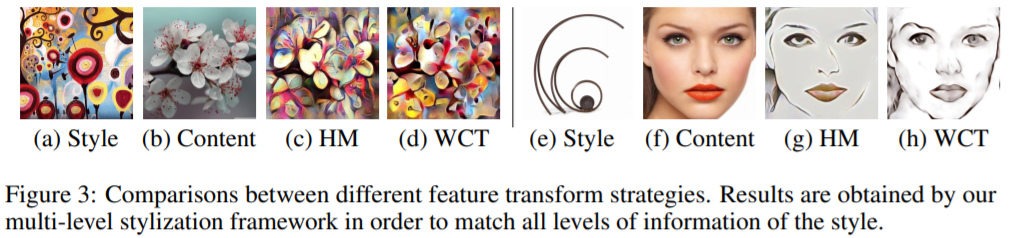

위의 그림 Figure 3은 WCT와 HM(histogram matching)의 성능을 비교한 것이다.

HM 기법은 style image의 global color을 잘 전달하는 데 도움이되지만 눈에 띄는 시각적 패턴을 캡처하지 못하며 패턴이 조각으로 나뉘고 local 구조가 잘못 표현된다.대조적으로 WCT는 style image를 더 잘 반영하는 패턴을 보여준다. 이러한 결과 차이의 원인은 HM 기법은 covariance matrix이 정확히 설계된 feature channel 간의 상관 관계를 고려하지 않기 때문이다.

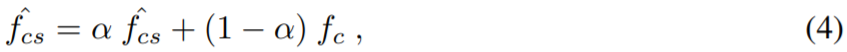

마지막으로 decoder에 넣기 전에 style의 강도를 조절하기 위해 위와 같이 blend 작업을 하게 된다. (α가 바로 사용자가 조정하는 style wieght 값이다.)

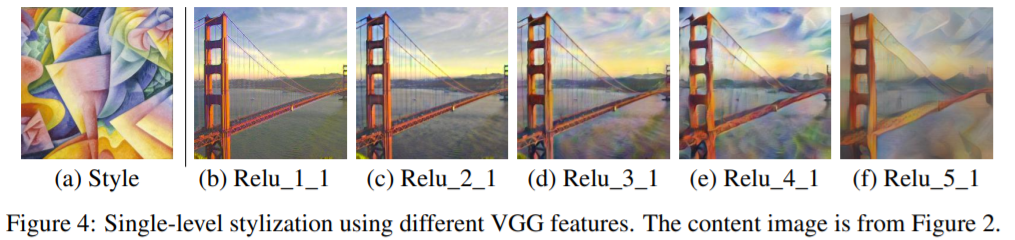

위의 그림 Figure 4에서는 각 layer별 style화된 image를 보여준다. 이를 통해 상위 layer는 high-level의 더 복잡한 local 구조를 캡처하는 반면 하위 layer는 더 low-level의 정보(color)를 전달한다는 것을 알 수 있다.. 따라서 low-level에서 high-level까지 스타일의 특성을 완전히 포착하려면 5개 layer 모두에를 사용하는 것이 좋다.

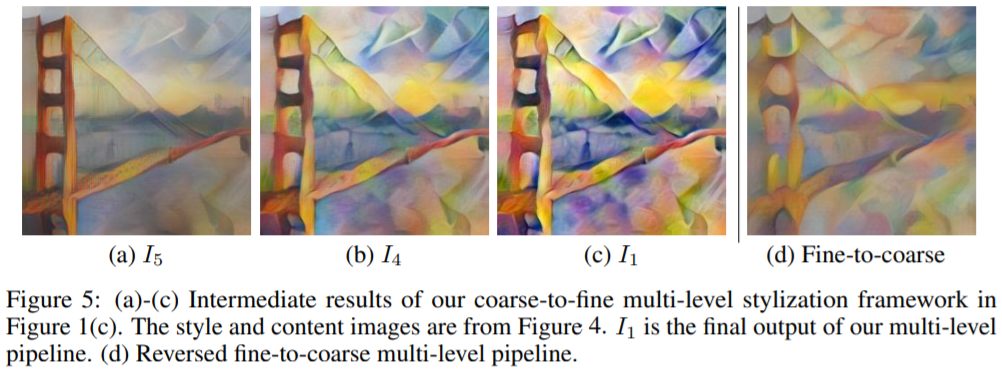

위의 그림 Figure 5는 위에서 봤던 Figure 1의 (c) 부분과 같이 multi-level pipeline에서의 중간 결과를 보여준다. 이는 곧 상위 layer가 먼저 style의 두드러진 패턴을 캡처하고 하위 layer가 detail한 부분을 더욱 개선한다는 것을 의미한다.

만일 순서를 반대로 할 경우 위의 그림 Figure 5의 (d) 부분과 같이 하위 수준 정보를 보존 할 수 없다.

## **Experiments**

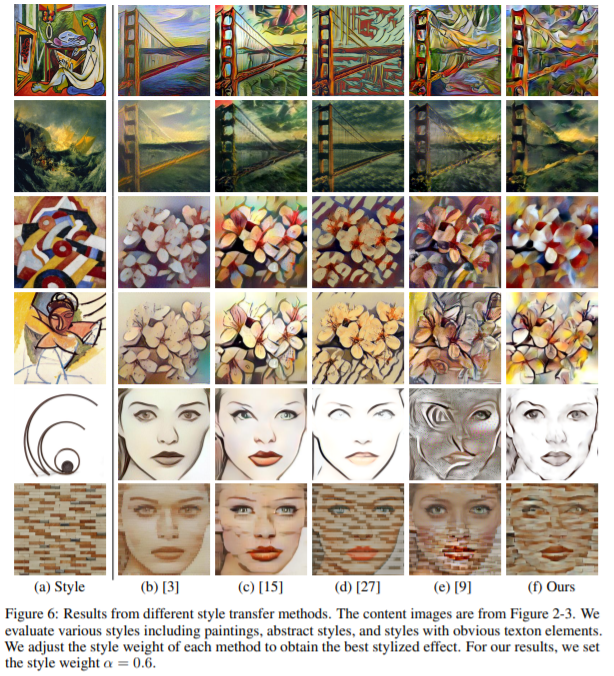

위의 그림 Figure 6은 기존의 기법들과 본 논문의 성능을 비교한 것이다. 

먼저 (e) 부분의 기법은 최적화 기반 기법인데, 이는 5, 6번째 행과 같이 local minima 문제가 나올 수 있다.

(d) 부분의 기법은 속도 측면에서 뛰어나지만, 품질과 효율성이 trades off 관계를 가지며, image 내용과 중첩되는 반복적인 패턴을 생성하는 경향이 있다.

(b), (c) 부분은 본 논문과 비슷한 이유로 나온 최신의 기법들인데, 품질이 덜 매력적이다.

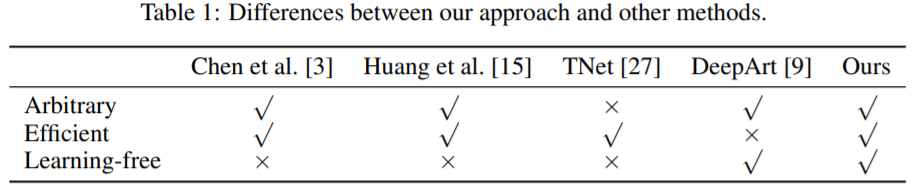

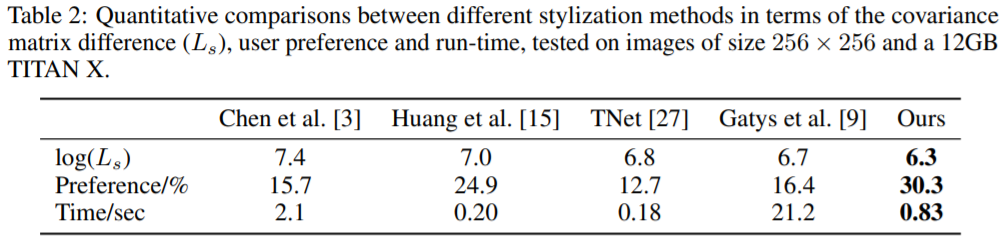

위의 표들 Table 1과 2는 위의 그림 Figure 6에서 살펴본 기법들을 표로 비교한 것이다.

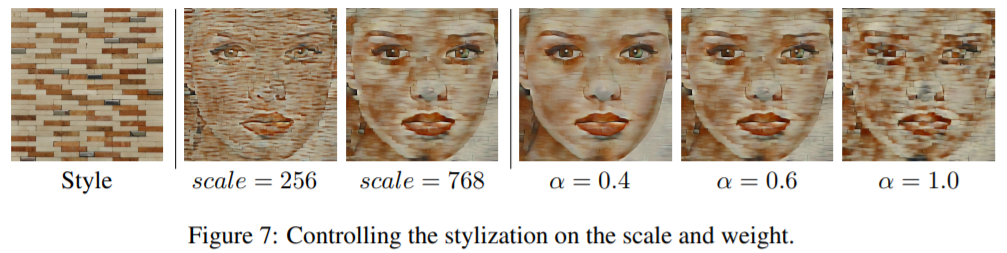

위의 그림 Figure 7은 styllization에 대해 scale과 weight를 제어한 결과이다. scale은 style image의 크기를 조정하는 것이고, weight는 content와 style간의 균형을 제어하는 것이다.

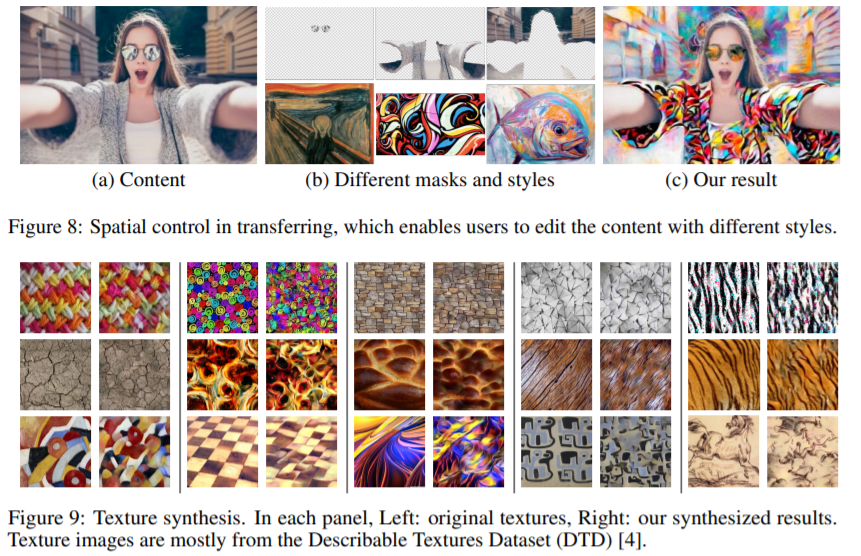

위의 그림 Figure 8은 mask M을 활용하여 공간을 조절해 style을 입히는 것을 보여준다. 또한, white noise를 활용하여 ^f_c를 초기하면 위의 그림 Figure 9와 같이 texture synthesis도 가능하다.

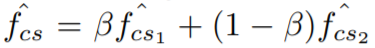

Texture synthesis는 위의 β값을 조절할 수 있는데,

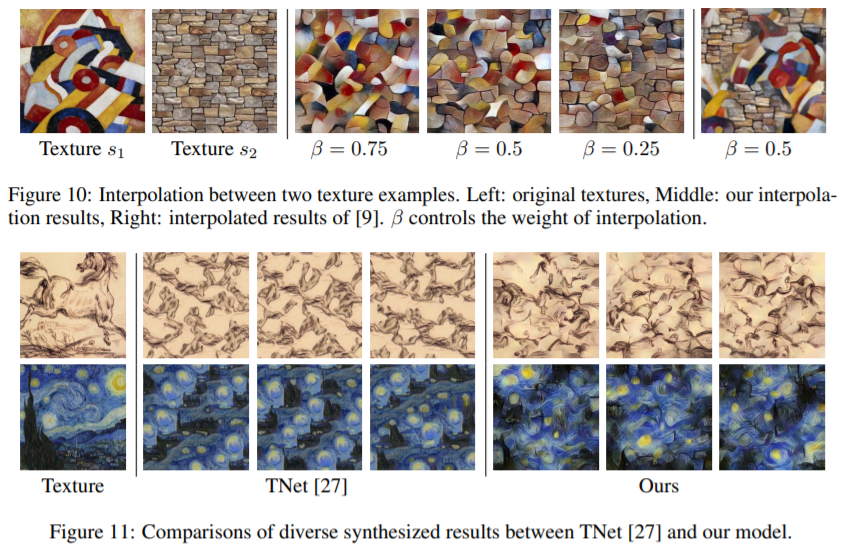

위의 그림 Figure 10이 β값을 조절하여 나오는 결과물이다. 그리고 위의 그림 Figure 11은 TNet과의 결과물을 비교한 것이다.